# Assignment 10


# 20135619 LeeKangJin

# Git Link : https://github.com/LeeKangJin/assignment


import a package.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

# given function.

normalize, distance

In [2]:
#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)


In [3]:
#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

# Declare Global variable 

In [4]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images


mean = 0
std  = 1

max_p = 500

number_of_scores = 10

f1_scores = [0]*number_of_scores

# create random vector list

In [5]:
random_vectors = np.zeros((max_p,size_row*size_col) ,dtype=float) # 행렬화가 나을수 있음

for i in range(max_p):
    random_vector = np.random.normal(mean, std, size_row*size_col)
    random_vectors[i,:] = random_vector
    

# Make Random value List

In [6]:
#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]

    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

   
    list_label_train[count]     = label

    list_image_train[:, count]  = im_vector    

    count += 1

count = 0



for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)
 
    
    list_label_test[count]     = label 
    
    list_image_test[:, count]   = im_vector    

    count += 1




# least square 
$$ Ax - b $$
A : image matrix

x : binary classifer ( this section is zero classifer ) 

b : result ( made by label. zero is 1 , nonzeor is -1 ) 

# Make A Matrix 

number of image is row. 


In [7]:
def matrixA(images,randomvectors,p):
    Row_size = np.shape(images)[1] # image number.
    Col_size = p # image colum number.
    
    
    
    A = np.empty((Row_size,Col_size),dtype=float)

    for i in range(Row_size):
        for j in range(Col_size):
                A[i,j] = np.sum(images[:,i]*randomvectors[j]) # np 형식 때문에 잘되는지 확인 필요..
    return A

# Make B

In [8]:
def matrixB(labels,j):
    
    leng = np.shape(labels)[0]
    B = labels.reshape((leng,1))

    digit = [B ==j, B!=j]
    trueOrnot = [1,-1]

    return np.select(digit,trueOrnot)

# Tall Matrix Sudo Inverse 

$$ A_{sudo} = (A^{T}A)^{-1}A^{T} $$

 * A is not linear independent = can not use inverse.
 
 * So i use pinv.

In [9]:
def Asudo(A):
    A_transpose = A.transpose()
    SudoA = np.matmul(A_transpose,A)
    SudoA = np.linalg.pinv(SudoA)
    SudoA = np.matmul(SudoA,A_transpose)
    return SudoA

# Solve least square

$$ x = A_{sudo}b $$

In [10]:
def cal_average(list_image,list_index):
    aver = np.zeros((28*28),dtype = float)
    for i in range(len(list_index)):
        aver = aver + list_image[:,list_index[i]]
    
    aver = aver/ len(list_index) 
    
    return aver

In [11]:
def plot_image(aver_image,title):
    plt.title(title)
    plt.imshow(aver_image.reshape((28, 28)), 
               cmap='Greys', interpolation='None') 
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.show()

In [12]:
def onetime_x(ourP,j):
    A = matrixA(list_image_train,random_vectors,ourP)
    B = matrixB(list_label_train,j)

    SudoA = Asudo(A)

    x = np.matmul(SudoA,B)
    return x

# F1 Score :  

$$ F_{1} = 2 \frac{(precision \cdot recall)}{precison+recall}$$


$$ precision = \frac{TP}{TP+FP} $$


$$ recall = \frac{TP}{TP+FN} $$

In [13]:
def f1_score_function(tp,tn,fp,fn):
    precision = tp/(tp+fp)
    
    if tp+fn == 0:
        print("error")

    recall = tp/(tp+fn)

    f1_score = 2*(precision*recall)/(precision+recall)

    return f1_score

In [14]:
def onetime_f1score(ourP,x,j):
    Atest = matrixA(list_image_test,random_vectors,ourP)
    Btest = matrixB(list_label_test,j)

    tp = 0
    fp = 0
    tn = 0
    fn = 0

    tpindex = []
    fpindex = []
    tnindex = []
    fnindex = []


    xtest = np.matmul(Atest,x)


    xtest[ xtest == 0 ]  = 1 
    xtest = np.sign(xtest)



    # ax = b test
    for i in range(len(list_label_test)):


        if (xtest[i,0] == 1.0) and (int(1) == int(Btest[i,0])) :
            tpindex.append(i)
            tp = tp +1

        elif (xtest[i,0] == -1.0) and (int(-1) == int(Btest[i,0])) :
            fpindex.append(i)
            fp = fp +1

        elif (xtest[i,0] == 1.0 ) and (int(1) != int(Btest[i,0])):
            tnindex.append(i)
            tn = tn +1

        else:
            fnindex.append(i)
            fn = fn +1

    return tp,fp,tn,fn,tpindex,fpindex,tnindex,fnindex,f1_score_function(tp,tn,fp,fn)

    

# F1 score graph

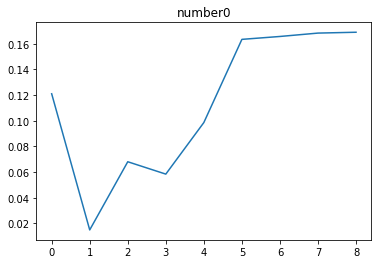

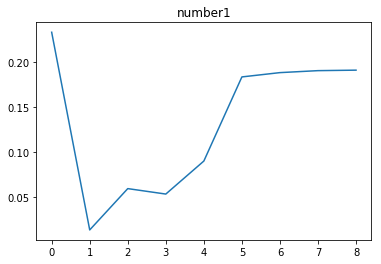

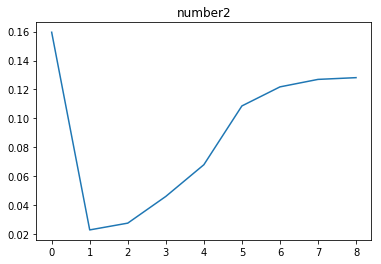

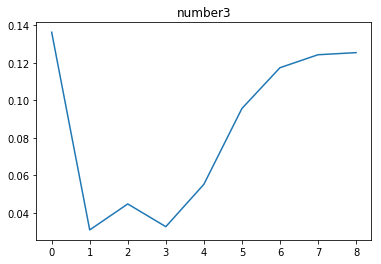

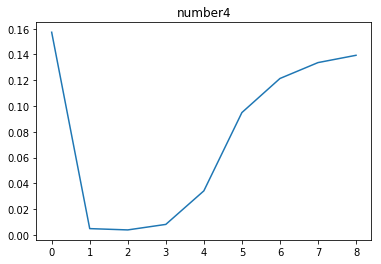

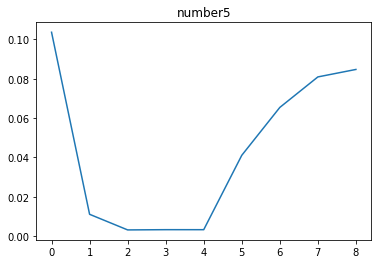

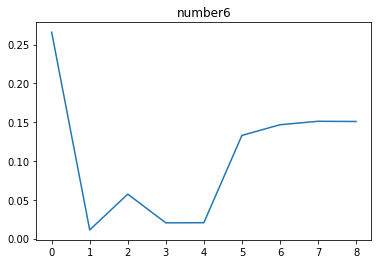

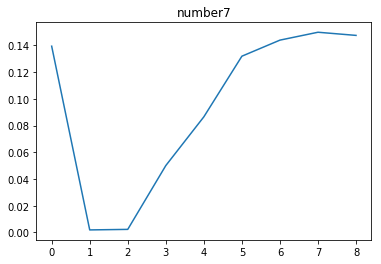

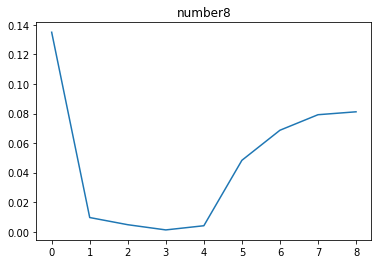

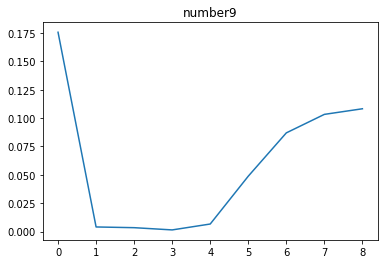

In [15]:
tplist=[]
fplist=[]
tnlist=[]
fnlist=[]
higestJ = 0
graphtitle= ""
f1_scoreList =[]

for j in range(10):
    y = []
    fc= []
    for i in [1,2,4,8,16,64,128,256,499]:
        fc.append(onetime_f1score(i,onetime_x(i,j),j))
        y.append(fc[-1][-1])
    graphtitle = "number"+str(j)
    plt.title(graphtitle)
    plt.plot([0,1,2,3,4,5,6,7,8],y)


    soluationResult = max(y)

    for i in range(len(y)):
        if y[i] == soluationResult:
            c = i
            break

    tp,fp,tn,fn,tpindex,fpindex,tnindex,fnindex,f1_score =fc[c]
    
    tplist.append(tp)
    fplist.append(fp)
    tnlist.append(tn)
    fnlist.append(fn)
    f1_scoreList.append(f1_score)
    
    plt.show()

# Find Maximum F1_Score in 0 to 9 



In [16]:
higestJ = f1_scoreList.index(max(f1_scoreList)) # highest f1 score



# Plot TP Number & highest f1 's average TP 

825


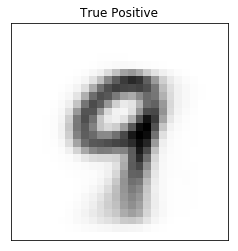

In [17]:
print(tplist[higestJ])
aver = cal_average(list_image_test,tpindex)
plot_image(aver,"True Positive")
aver = np.zeros((28*28),dtype = float)

# Plot FP Number & highest f1 's average FP

4421


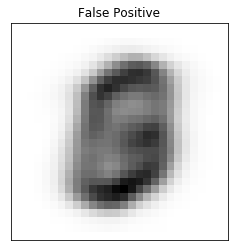

In [18]:
print(fplist[higestJ])
aver = cal_average(list_image_test,fpindex)
plot_image(aver,"False Positive")
aver = np.zeros((28*28),dtype = float)

# Plot TN Number &highest f1 's average TN

4621


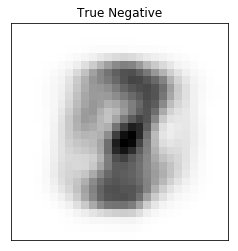

In [19]:
print(tnlist[higestJ])
aver = cal_average(list_image_test,tnindex)
plot_image(aver,"True Negative")
aver = np.zeros((28*28),dtype = float)

# Plot FN Number & highest f1 's average FN

133


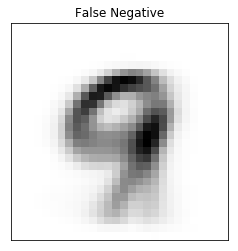

In [20]:
print(fnlist[higestJ])
aver = cal_average(list_image_test,fnindex)
plot_image(aver,"False Negative")
aver = np.zeros((28*28),dtype = float)

# Highest F1 score (argument max)

In [21]:
print("number:"+higstJ)
print(f1_scoreList[higestJ])

0.2659574468085107
